<a href="https://colab.research.google.com/github/wiz124/chem169-git/blob/main/Li_Harry_RID_014_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Exercise 0
import pickle
from Bio import SeqIO
import numpy as np
import pandas as pd

seq_embed={}
toy_seq={}
with open('toy_esm2_embeddings.pkl', 'rb') as f:
  data=pickle.load(f)
  for seq_record in SeqIO.parse("toy_sequences.fasta", "fasta"):
      toy_seq[str(seq_record.id)]=str(seq_record.seq)
      seq_embed[str(seq_record.seq)]=data[seq_record.id]
print(seq_embed)
print(toy_seq)



{'MACHINELEARNING': {'residue_embeddings': array([[ 0.05606826, -0.02779197,  0.1984435 , ...,  0.29308623,
        -0.0005211 , -0.001761  ],
       [ 0.01368738,  0.08926699,  0.07153449, ...,  0.02676891,
        -0.05958881,  0.08751322],
       [ 0.0791374 ,  0.05739338,  0.05229965, ..., -0.12164824,
        -0.2122045 , -0.03057704],
       ...,
       [-0.07602476,  0.17316677,  0.04309352, ..., -0.17556725,
         0.18471679,  0.06163794],
       [ 0.0032055 ,  0.07336932,  0.23836282, ..., -0.11572927,
        -0.1422069 ,  0.17654972],
       [ 0.1213042 ,  0.09664907,  0.15444879, ..., -0.22865772,
        -0.07566334, -0.07008101]], dtype=float32), 'protein_embedding': array([ 2.7157145e-02,  6.7918792e-02,  1.1835212e-01, ...,
       -3.1786315e-02,  6.4118205e-05,  1.0375285e-02], dtype=float32)}, 'MGCHINELEARNING': {'residue_embeddings': array([[-0.01221433, -0.04243858,  0.23617591, ...,  0.26975685,
        -0.10064612,  0.03309401],
       [ 0.1237796 , -0.01890814

In [29]:
#Exercise 1
residue_shape=seq_embed[toy_seq['WT']]['residue_embeddings'].shape
print(f'Shape of residue ESM embedding: {residue_shape}')
protein_shape=seq_embed[toy_seq['WT']]['protein_embedding'].shape
print(f'Shape of protein ESM embedding: {protein_shape}')


Shape of residue ESM embedding: (15, 1280)
Shape of protein ESM embedding: (1280,)


Exercise 1

Q2: The shape is is directly proportional to the length of the input protein sequence.

In [30]:
#Exercise 2
WT_mean=np.mean(seq_embed[toy_seq['WT']]['residue_embeddings'], axis=0)
print(WT_mean)
print(seq_embed[toy_seq['WT']]['protein_embedding'])

assert list(WT_mean) == list(seq_embed[toy_seq['WT']]['protein_embedding'])
print('They are the same')

[ 2.7157145e-02  6.7918792e-02  1.1835212e-01 ... -3.1786315e-02
  6.4118205e-05  1.0375285e-02]
[ 2.7157145e-02  6.7918792e-02  1.1835212e-01 ... -3.1786315e-02
  6.4118205e-05  1.0375285e-02]
They are the same


Exercise 2

Q1: An embedding per protein would lose structural and functional data that each amino acid contains since the protein embedding is an average into a vector.

Q2:
A single embedding for an entire protein allows for an efficient summary of the protein. It makes large scale analysis and machine learning more efficient.

In [31]:
#Exercise 3
WT_entry={}
MT_entry={}
with open('toy_esm2_embeddings.pkl', 'rb') as f:
  data=pickle.load(f)
  for key, value in data.items():
    print(f'ID: {key}')
    if key=='WT':
      WT_entry[key]=value
    else:
      MT_entry[key]=value

MT_sequences={}
WT_sequences={}
with open("toy_sequences.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
      if record.id !='WT':
        MT_sequences[record.id]=str(record.seq)
      else:
        WT_sequences[record.id]=str(record.seq)

for key,value in MT_sequences.items():
  difference=0
  for i in range(len(value)):
    if value[i]!=WT_sequences['WT'][i]:
      difference+=1
    else:
      continue
  print(f'{key} and WT differ by {difference} chars')

print(WT_entry)
print(MT_entry)

ID: WT
ID: M1_1
ID: M1_2
ID: M2_1
ID: M2_2
ID: M3_1
ID: M3_2
M1_1 and WT differ by 1 chars
M1_2 and WT differ by 1 chars
M2_1 and WT differ by 1 chars
M2_2 and WT differ by 1 chars
M3_1 and WT differ by 1 chars
M3_2 and WT differ by 1 chars
{'WT': {'residue_embeddings': array([[ 0.05606826, -0.02779197,  0.1984435 , ...,  0.29308623,
        -0.0005211 , -0.001761  ],
       [ 0.01368738,  0.08926699,  0.07153449, ...,  0.02676891,
        -0.05958881,  0.08751322],
       [ 0.0791374 ,  0.05739338,  0.05229965, ..., -0.12164824,
        -0.2122045 , -0.03057704],
       ...,
       [-0.07602476,  0.17316677,  0.04309352, ..., -0.17556725,
         0.18471679,  0.06163794],
       [ 0.0032055 ,  0.07336932,  0.23836282, ..., -0.11572927,
        -0.1422069 ,  0.17654972],
       [ 0.1213042 ,  0.09664907,  0.15444879, ..., -0.22865772,
        -0.07566334, -0.07008101]], dtype=float32), 'protein_embedding': array([ 2.7157145e-02,  6.7918792e-02,  1.1835212e-01, ...,
       -3.1786315e-

In [32]:
#Exercise 4
from sklearn.metrics.pairwise import cosine_similarity


def compute_similarity(WT_embedding, MT_embedding):
  queryid=['WT']
  query_matrix=np.array([WT_embedding[id] for id in queryid])

  db_ids=list(MT_embedding.keys())
  db_matrix=np.array([MT_embedding[id] for id in db_ids])

  comp=cosine_similarity(query_matrix,db_matrix)
  return comp
def tophits(similarity, MT_embedding,MT_info):
  MT_ids=list(MT_embedding.keys())
  result=[]

  for i in range(len(similarity[0])):
      hit_id=MT_ids[i]
      score=similarity[0][i]
      result.append(
          {
          'sequence id': hit_id,
          'cosine similarity': score,
          'Mutation position': MT_info[hit_id][0],
          'Amino acid change': MT_info[hit_id][2]+'--->'+MT_info[hit_id][1]
    }
      )
  return result

MT_info={}
MT_embedding={}
WT_embedding={}
for key,value in MT_sequences.items():
  MT_embedding[key]=MT_entry[key]['protein_embedding']

  for i in range(len(value)):
    if value[i]!=WT_sequences['WT'][i]:

      #list structured as [idx,mutant char,wt char]
      MT_info[key]=[i,value[i],WT_sequences['WT'][i]]
      print(f'{key} differs from WT at index pos {i}, where {WT_sequences['WT'][i]} is swapped with {value[i]}')
    else:
      continue

WT_embedding['WT']=WT_entry['WT']['protein_embedding']

comparison=compute_similarity(WT_embedding,MT_embedding)
table=tophits(comparison,MT_embedding,MT_info)
resultdf=pd.DataFrame(table)
display(resultdf)

M1_1 differs from WT at index pos 1, where A is swapped with G
M1_2 differs from WT at index pos 1, where A is swapped with L
M2_1 differs from WT at index pos 7, where L is swapped with A
M2_2 differs from WT at index pos 7, where L is swapped with G
M3_1 differs from WT at index pos 14, where G is swapped with A
M3_2 differs from WT at index pos 14, where G is swapped with L


,sequence id,cosine similarity,Mutation position,Amino acid change
0,M1_1,0.993105,1,A--->G
1,M1_2,0.990491,1,A--->L
2,M2_1,0.997603,7,L--->A
3,M2_2,0.988023,7,L--->G
4,M3_1,0.997718,14,G--->A
5,M3_2,0.983698,14,G--->L


Exercise 4
It appears there is very little differene between mutations that occur at different locations. This may be due to the size of the sequence being small.

It appears swapping between L and G amino acids result in a decrease in similarity but compared to a swap between alanine, the difference is nearly negligible.

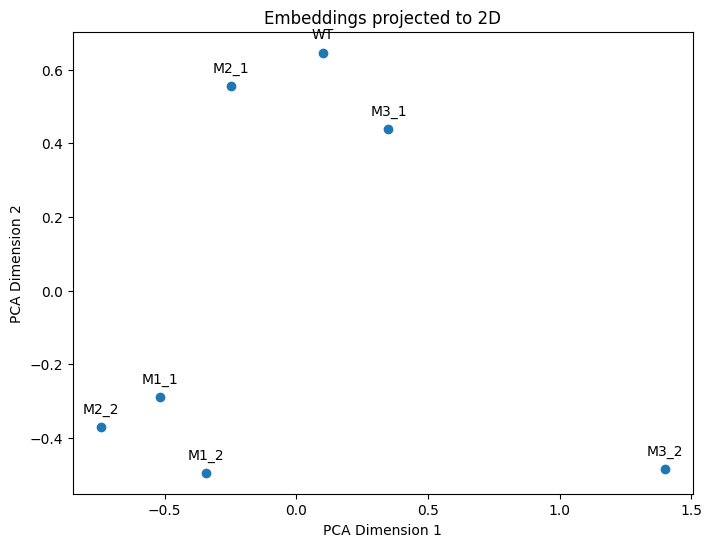

In [34]:
#Exercise 5
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

protein_embeddings={}
for key,value in toy_seq.items():
  protein_embeddings[key]=seq_embed[value]['protein_embedding']

embeddings = np.array(list(protein_embeddings.values()))

pca=PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title("Embeddings projected to 2D")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

for i, label in enumerate(protein_embeddings.keys()):
  plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]),
               textcoords="offset points",xytext=(0, 10),
               ha='center')

plt.show()